# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [14]:
import pandas as pd

df = pd.read_csv('titanic_passengers.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


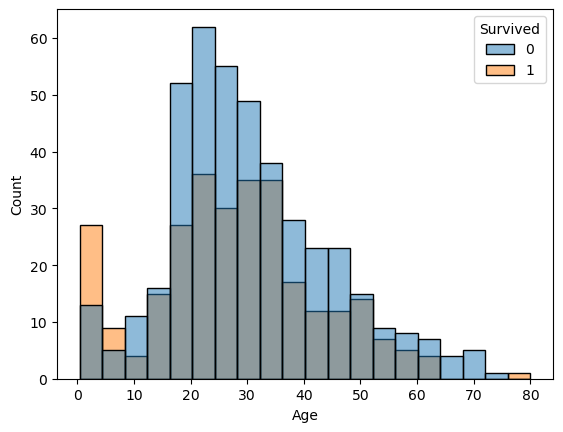

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='Age', data=df, hue='Survived')

plt.show()

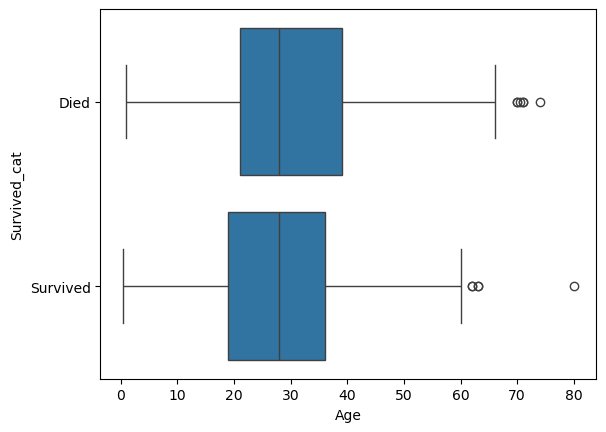

In [8]:
df.loc[df['Survived'] == 0, 'Survived_cat'] = 'Died'
df.loc[df['Survived'] == 1, 'Survived_cat'] = 'Survived'

sns.boxplot(x='Age', data=df, y='Survived_cat')
plt.show()

In [9]:
df['Survived'].dtype

dtype('int64')

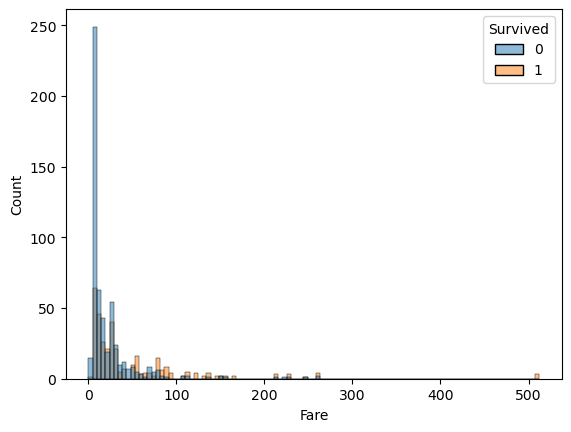

In [10]:
sns.histplot(x='Fare', data=df, hue='Survived')

plt.show()

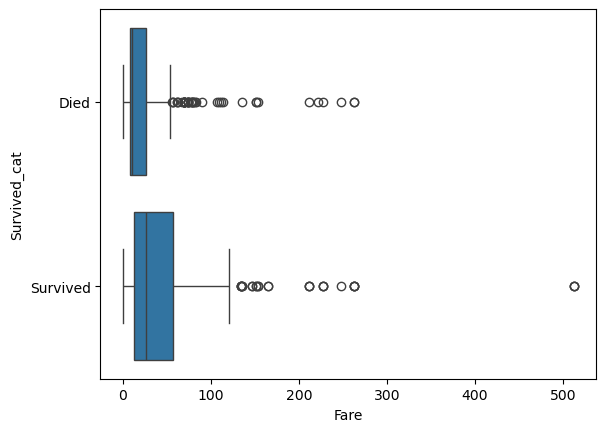

In [11]:
sns.boxplot(x='Fare', data=df, y='Survived_cat')

plt.show()

In [19]:
# Most likely to survive:
likely_survivor = df.loc[
    (df['Sex'] == 'female') &
    (df['Pclass'] == 1) &
    (df['Age'] <= 18)
].head(1)

print("Most Likely Survivor Candidate:")
print(likely_survivor[['Name', 'Sex', 'Age', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Survived']])

# Least likely to survive:
least_survivor = df.loc[
    (df['Sex'] == 'male') &
    (df['Pclass'] == 3) &
    (df['Age'] >= 30)
].head(1)

print("\nLeast Likely Survivor Candidate:")
print(least_survivor[['Name', 'Sex', 'Age', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Survived']])

Most Likely Survivor Candidate:
                             Name     Sex  Age  Pclass    Fare  SibSp  Parch  \
297  Allison, Miss. Helen Loraine  female  2.0       1  151.55      1      2   

    Embarked  Survived  
297        S         0  

Least Likely Survivor Candidate:
                       Name   Sex   Age  Pclass  Fare  SibSp  Parch Embarked  \
4  Allen, Mr. William Henry  male  35.0       3  8.05      0      0        S   

   Survived  
4         0  


# Sex vs Survival

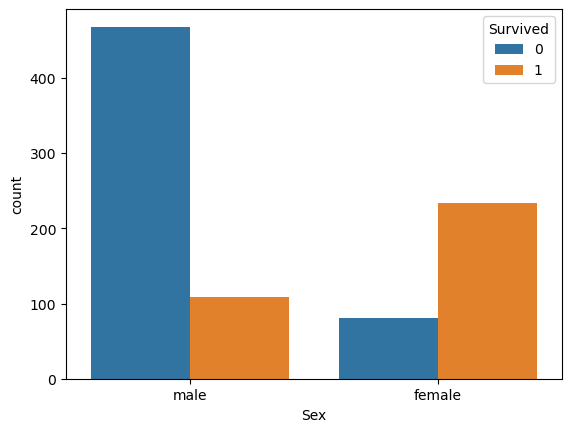

In [26]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

As seen above, Females are most likely to survive. Males would be least likely to survive.

# Class vs Survival

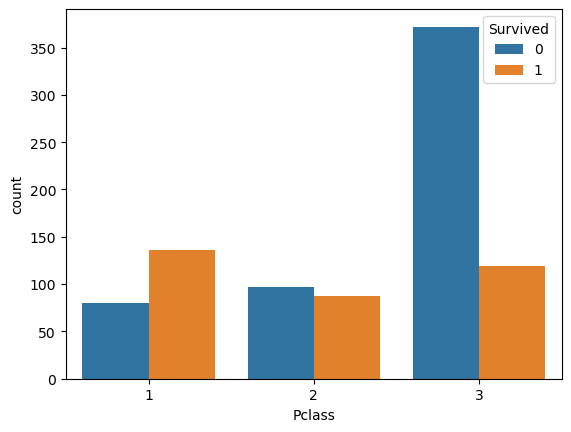

In [25]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()

As seen above, 1st class passengers are most likely to survive. 3rd class passengers are least likely.

# Embrked vs Survival

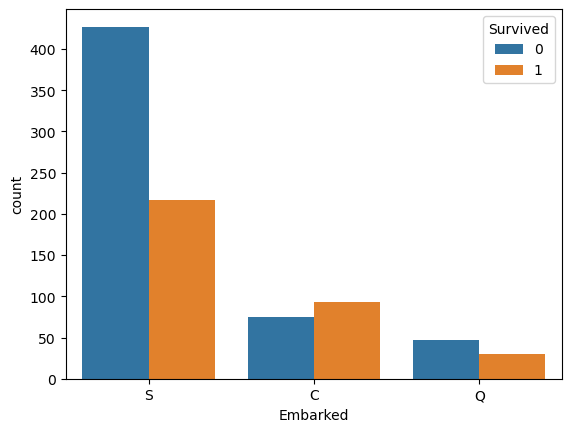

In [24]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.show()

As seen above, passengers embarking from port Southampton are least likely to survive. However, class and sex will determine their chances for survival.

# Most Likely to Survive

> ## Helen Loraine Allison

In [22]:
likely_survivor = df.loc[
    (df['Sex'] == 'female') &
    (df['Pclass'] == 1) &
    (df['Age'] <= 18)
].head(1)

print("Most Likely Survivor Candidate:")
print(likely_survivor[['Name', 'Sex', 'Age', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Survived']])

Most Likely Survivor Candidate:
                             Name     Sex  Age  Pclass    Fare  SibSp  Parch  \
297  Allison, Miss. Helen Loraine  female  2.0       1  151.55      1      2   

    Embarked  Survived  
297        S         0  


- She was 2 years old (born June 5, 1909).
- First-class passenger, part of the Allison family (Hudson Allison and Bess Allison were her parents, with a younger brother Trevor) traveling to Montreal.
- She was the only child in first or second class who died in the Titanic disaster.
- There was a long-standing claim by a woman (Helen Loraine Kramer) from 1940 that she was Loraine Allison, saying she was somehow saved and raised under another identity. That claim lasted decades, but was eventually disproved by DNA testing in 2013, which showed no genetic relation between Kramer’s descendants and the Allison family.

# Least Likely to Survive

> ## William Henry Allen

In [23]:
least_survivor = df.loc[
    (df['Sex'] == 'male') &
    (df['Pclass'] == 3) &
    (df['Age'] >= 30)
].head(1)

print("\nLeast Likely Survivor Candidate:")
print(least_survivor[['Name', 'Sex', 'Age', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Survived']])


Least Likely Survivor Candidate:
                       Name   Sex   Age  Pclass  Fare  SibSp  Parch Embarked  \
4  Allen, Mr. William Henry  male  35.0       3  8.05      0      0        S   

   Survived  
4         0  


- He was about 39 years old, male, English, traveling in third class.
- His ticket cost roughly £8 1s. He embarked at Southhampton.
- He worked as a tool maker, married to Florence Ann Rigby
- A suitcase belonging to him was retrieved from the wreck around 2000; it had clothing with a laundry tag “W. Allen” which connects tangible personal artifacts to him over a century later.
- His estate was valued at £167, 10s and was administered to his widow on April 5, 1913. His wife never remarried, and she later lived in Bridgford, Nottinghamshire until her death in 1965.